In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import getTimeGAN

# 2. Data loading
from timegan.dataOps import real_data_loading, sine_data_generation
# 3. Metrics
from timegan.metrics.discriminative_metrics import discriminative_score_metrics
from timegan.metrics.predictive_metrics import predictive_score_metrics
from timegan.metrics.visualization_metrics import visualization

In [2]:
#Loading the data
data = real_data_loading()
no, dim, seq_len = 10000, 5, 24
data_norm = sine_data_generation(no, seq_len, dim)

In [5]:
parameters = dict()

parameters['module'] = 'gru'
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 10
parameters['batch_size'] = 128

In [6]:
generated_data = getTimeGAN.getTimeGAN(data_norm, parameters)

Start Embedding Network Training
step: 0/10, e_loss: 0.3488
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/10, s_loss: 0.1286
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/10, d_loss: 2.3374, g_loss_u: 0.5802, g_loss_s: 0.0628, g_loss_v: 0.3839, e_loss_t0: 0.3267
Finish Joint Training


In [8]:
metric_iteration = 5

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(data_norm, generated_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

Instructions for updating:
Please use tf.global_variables instead.
Discriminative score: 0.3728


In [9]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(data_norm, generated_data)
  predictive_score.append(temp_pred)

print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))


Predictive score: 0.2498


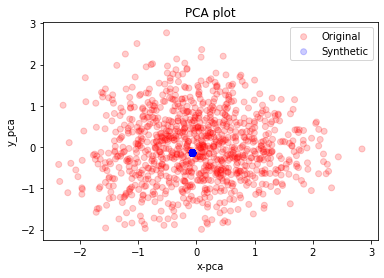

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.010s...
[t-SNE] Computed neighbors for 2000 samples in 0.444s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000810
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.268791
[t-SNE] KL divergence after 300 iterations: 0.882289


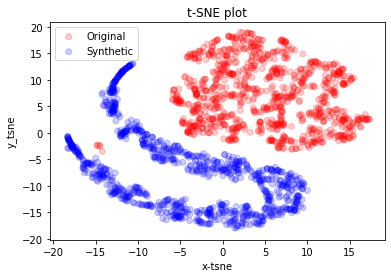

In [10]:
visualization(data_norm, generated_data, 'pca')
visualization(data_norm, generated_data, 'tsne')